# Setting up

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load data and explore

In [3]:
oecd_bli = pd.read_csv("./datasets/oecd_bli_2015.csv", thousands=',')

In [4]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [5]:
gdp_per_capita = pd.read_csv("./datasets/gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values="n\a")

In [6]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


# Prepare the data

## Define a function that merges the datasets

In [7]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                 left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

## Merge the datasets, explore and prepare

In [8]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [9]:
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [10]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data

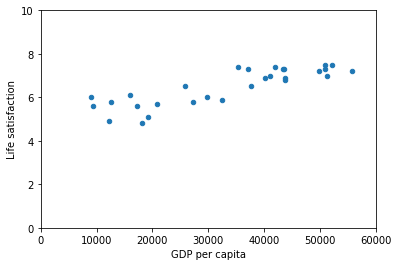

In [18]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.show()

# Select a linear model

In [12]:
model = sklearn.linear_model.LinearRegression()

# Train the model

In [13]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Make a prediction for Cyprus

In [14]:
X_new = [[22587]] # Cyprus' GDP per capita
print(model.predict(X_new))

[[5.96242338]]


# Try instance-based model and predict

In [15]:
instance_based_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
instance_based_model.fit(X, y)
print(instance_based_model.predict(X_new))

[[5.76666667]]


# Plot the models

## Plotting the model-based model (linear regression)

In [16]:
t0, t1 = model.intercept_[0], model.coef_[0][0]
t0, t1

(4.853052800266436, 4.911544589158484e-05)

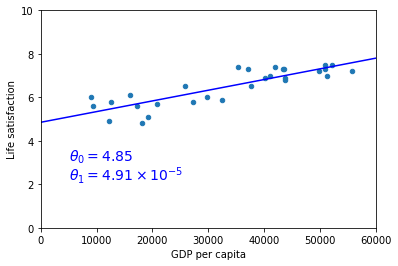

In [17]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.show()

## Plotting the instance-based model

In [ ]:
# How do we do this?

# Evaluate the models

In [25]:
instance_based_model.score(X, y)

0.8525732853499179

In [26]:
model.score(X, y)

0.734441435543703